##### Задание 1
- Импортируйте библиотеки pandas и numpy.
- Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
- Создайте датафреймы X и y из этих данных.
- Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
- Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
- Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
- Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [7]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston.data

In [51]:
target = boston.target

In [52]:
feature_names = boston.feature_names

In [53]:
x = pd.DataFrame(data, columns=feature_names)

In [54]:
x.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [55]:
y = pd.DataFrame(target, columns=['price'])

In [56]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(x_train, y_train) 

LinearRegression()

In [62]:
y_pred = lr.predict(x_test)

In [63]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                          'y_pred': y_pred.flatten()},
                         columns=['y_test', 'y_pred'])

In [64]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [65]:
check_test.head()

,y_test,y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280


In [66]:
from sklearn.metrics import r2_score

In [67]:
lr_score = r2_score(y_test, y_pred)
lr_score

0.711226005748496

#### Задание 2
- Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
- Сделайте агрумент n_estimators равным 1000,
- max_depth должен быть равен 12 и random_state сделайте равным 42.
- Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
- но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
- чтобы получить из датафрейма одномерный массив Numpy,
- так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
- Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
- Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [23]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [69]:
model.fit(x_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [70]:
y_pred = model.predict(x_test)

In [71]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                          'y_pred': y_pred.flatten()},
                         columns=['y_test', 'y_pred'])

In [72]:
check_test.head()

,y_test,y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521


In [73]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [74]:
check_test.head()

,y_test,y_pred,error
173,23.6,22.806412,-0.793588
274,32.4,31.131464,-1.268536
491,13.6,16.339125,2.739125
72,22.8,23.810726,1.010726
452,16.1,17.139521,1.039521


In [75]:
rfr_score = r2_score(y_test, y_pred)
rfr_score

0.87472606157312

In [79]:
print(f'Результаты применения моделей:\nLinearRegression = {lr_score},\nRandomForest = {rfr_score}')

Результаты применения моделей:
LinearRegression = 0.711226005748496,
RandomForest = 0.87472606157312


По результатам можно сделать вывод, что в данном датасете применение модели RandomForest предпочтительнее.

##### Задание 3
- Вызовите документацию для класса RandomForestRegressor,
- найдите информацию об атрибуте feature_importances_.
- С помощью этого атрибута найдите сумму всех показателей важности,
- установите, какие два признака показывают наибольшую важность.


- feature_importances_ : ndarray of shape (n_features,)
- The impurity-based feature importances.
- The higher, the more important the feature.
- The importance of a feature is computed as the (normalized)
total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance.

- Warning: impurity-based feature importances can be misleading for
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.

In [84]:
import matplotlib.pyplot as plt

%matplotlib inline

In [85]:
importances = model.feature_importances_
std = np.std([t.feature_importances_ for t in model.estimators_], axis=0)

<AxesSubplot:>

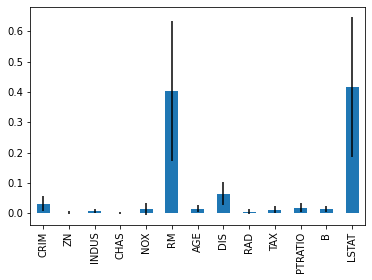

In [87]:
model_importances = pd.Series(importances, index=feature_names)

model_importances.plot.bar(yerr=std)

Наибольшую важность показывают признаки RM и LSTAT